In [41]:
from myclasses.sql_executor import SQLExecutor
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT 
            net_income,
            fiscal_year,
            ownership,
            gross_revenue,
            tot_days,
            tot_days_title_v,
            tot_days_title_xviii,
            tot_days_title_xix,
            num_beds,
            tot_bed_days_avail,
            snf_num_beds,
            snf_admis_tot,
            snf_avg_stay_len_title_tot,
            snf_days_total,
            tot_discharge_tot,
            snf_discharge_tot,
            tot_salaries,
            overhead_nonsalary_costs,
            cash,
            acct_rec,
            acct_payable,
            tot_current_assets,
            tot_fixed_assets,
            tot_assets,
            tot_liabilities,
            contract_labor,
            total_operating_expense,
            loc_type,
            current_ratio,
            deficiency_score,
            overall_rating,
            county_ssa,
            zip,
            resfamcouncil,
            sprinkler_status,
            chow_last_12mos,
            fine_cnt,
            fine_tot,
            tot_penlty_cnt,
            state,
            survey_rating,
            quality_rating,
            staffing_rating,
            rn_staffing_rating,
            aidhrd,
            vochrd,
            rnhrd,
            totlichrd,
            tothrd,
            pthrd,
            weighted_all_cycles_score,
            certification,
            bedcert,
            region,
            snf_size

        FROM Master
        ORDER BY prov_id;
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

# Assuming NA contract_labor means the Nursing home does have contract_labor
df[['contract_labor']] = df[['contract_labor']].fillna(0)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select columns where data type is text (object)
text_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for text columns
df_encoded = pd.get_dummies(df, columns=text_columns)

# Convert all columns to numeric type
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Extract target variable (y) and independent variables (X)
y = df_encoded['net_income']
X = df_encoded.iloc[:, 2:].fillna(0)

In [43]:
import umap.umap_ as umap

# Assuming X_train is your training data

# Define UMAP reducer
reducer = umap.UMAP()

# Fit and transform the training data
umap_embeddings = reducer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(umap_embeddings, y, test_size=0.2, random_state=42)

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Assuming X_train and y_train are already prepared dataframes

# Define the architecture of the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adamw', loss='huber')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=6, validation_split=0.2)

Epoch 1/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 454535.1875 - val_loss: 459101.2188
Epoch 2/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 450676.3750 - val_loss: 458764.5000
Epoch 3/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 454761.7188 - val_loss: 459316.0312
Epoch 4/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 452568.9375 - val_loss: 460192.4062
Epoch 5/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 452248.0938 - val_loss: 460977.1875
Epoch 6/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 453438.0000 - val_loss: 462235.9062
Epoch 7/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 452534.0938 - val_loss: 459265.3750
Epoch 8/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 451559.0625 - val_loss: 458540.7812
Epoch 9/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 450495.5625 - val_loss: 458640.9062
Epoch 10/100
5349/5349 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 450450.1250 - val_loss: 458290.7812

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, median_absolute_error, max_error, mean_absolute_error, mean_squared_error, explained_variance_score

# Apply the model on test data
y_pred = model.predict(X_test)

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Median Absolute Error
mabe = median_absolute_error(y_test, y_pred)

# Max Error
max_error_value = max_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)


print("Root Mean Squared Error: ${:.2f}".format(rmse))
print("Median Absolute Error: ${:.2f}".format(mabe))
print("Mean Absolute Error: ${:.2f}".format(mae))
print("Max Error: ${:.2f}".format(max_error_value))
print("R² Score (Coefficient of Determination): {:.5f}".format(r2))

314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Root Mean Squared Error: $1947130.74
Median Absolute Error: $505860.25
Mean Absolute Error: $882055.06
Max Error: $112368818.00
R² Score (Coefficient of Determination): 0.89763


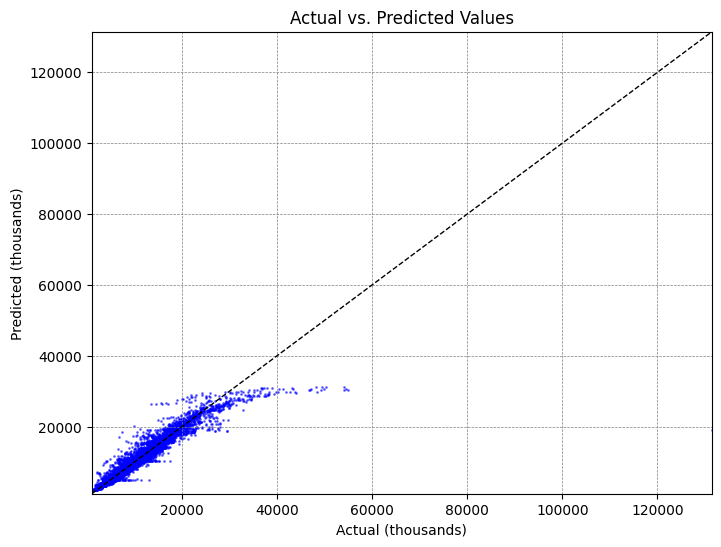

In [ ]:
import matplotlib.pyplot as plt

# Convert values to thousands
y_test_thousands = y_test / 1000
y_pred_thousands = y_pred / 1000

plt.figure(figsize=(8, 6))
plt.scatter(y_test_thousands, y_pred_thousands, color='blue', alpha=0.5, s=1)  # Scatter plot of actual vs. predicted values with smaller point size
plt.plot([y_test_thousands.min(), y_test_thousands.max()], [y_test_thousands.min(), y_test_thousands.max()], 'k--', lw=1)  # Plot the diagonal line
plt.xlabel('Actual (thousands)')
plt.ylabel('Predicted (thousands)')
plt.title('Actual vs. Predicted Values')

# Set axis limits to show the actual values
plt.xlim(left=y_test_thousands.min(), right=y_test_thousands.max())
plt.ylim(bottom=y_test_thousands.min(), top=y_test_thousands.max())

# Add light gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()